In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [11]:
df=pd.read_csv("Algerian_forest_fires_cleaned_dataset.csv")

In [12]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [13]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [14]:
# Drop month,day and year
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [15]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [16]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
Classes            1
not fire           1
not fire           1
Name: count, dtype: int64

In [17]:
## Encoding
df['Classes']=np.where(df['Classes'].str.contains(' not fire'), 0, 1)

In [18]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
240,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
241,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,1
242,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,1
243,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,1
244,24.0,64.0,15.0,0.2,67.3,3.8,16.5,1.2,4.8,0.5,1,1


In [19]:
df['Classes'].value_counts()

Classes
1    244
0      1
Name: count, dtype: int64

In [20]:
## Independent and Dependent Features
X = df.drop('FWI', axis=1)
y= df['FWI']

In [22]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,1,0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,1,0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,1,0
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,1,0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,1,0


In [23]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
240    6.5
241    0.0
242    0.2
243    0.7
244    0.5
Name: FWI, Length: 245, dtype: float64

In [25]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [26]:
X_train.shape,X_test.shape

((183, 11), (62, 11))

In [27]:
## Feature Sclection based on Correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.649277,-0.244543,-0.340599,0.695031,0.491692,0.377513,0.613979,0.462343,-0.098380,0.236849
RH,-0.649277,1.000000,0.207547,0.236170,-0.636573,-0.386237,-0.199921,-0.708731,-0.327449,0.125939,-0.397274
Ws,-0.244543,0.207547,1.000000,0.225023,-0.148944,0.007364,0.090563,0.042381,0.037835,-0.066268,-0.217156
Rain,-0.340599,0.236170,0.225023,1.000000,-0.563958,-0.290598,-0.299278,-0.338553,-0.300029,0.021106,-0.088065
FFMC,0.695031,-0.636573,-0.148944,-0.563958,1.000000,0.604919,0.504493,0.730833,0.587692,-0.057000,0.250374
DMC,0.491692,-0.386237,0.007364,-0.290598,0.604919,1.000000,0.865151,0.657108,0.981912,0.010141,0.184427
DC,0.377513,-0.199921,0.090563,-0.299278,0.504493,0.865151,1.000000,0.484460,0.941926,NaN,-0.104385
ISI,0.613979,-0.708731,0.042381,-0.338553,0.730833,0.657108,0.484460,1.000000,0.609329,-0.129905,0.281723
BUI,0.462343,-0.327449,0.037835,-0.300029,0.587692,0.981912,0.941926,0.609329,1.000000,0.032876,0.078388
Classes,-0.098380,0.125939,-0.066268,0.021106,-0.057000,0.010141,NaN,-0.129905,0.032876,1.000000,-0.072920


<Axes: >

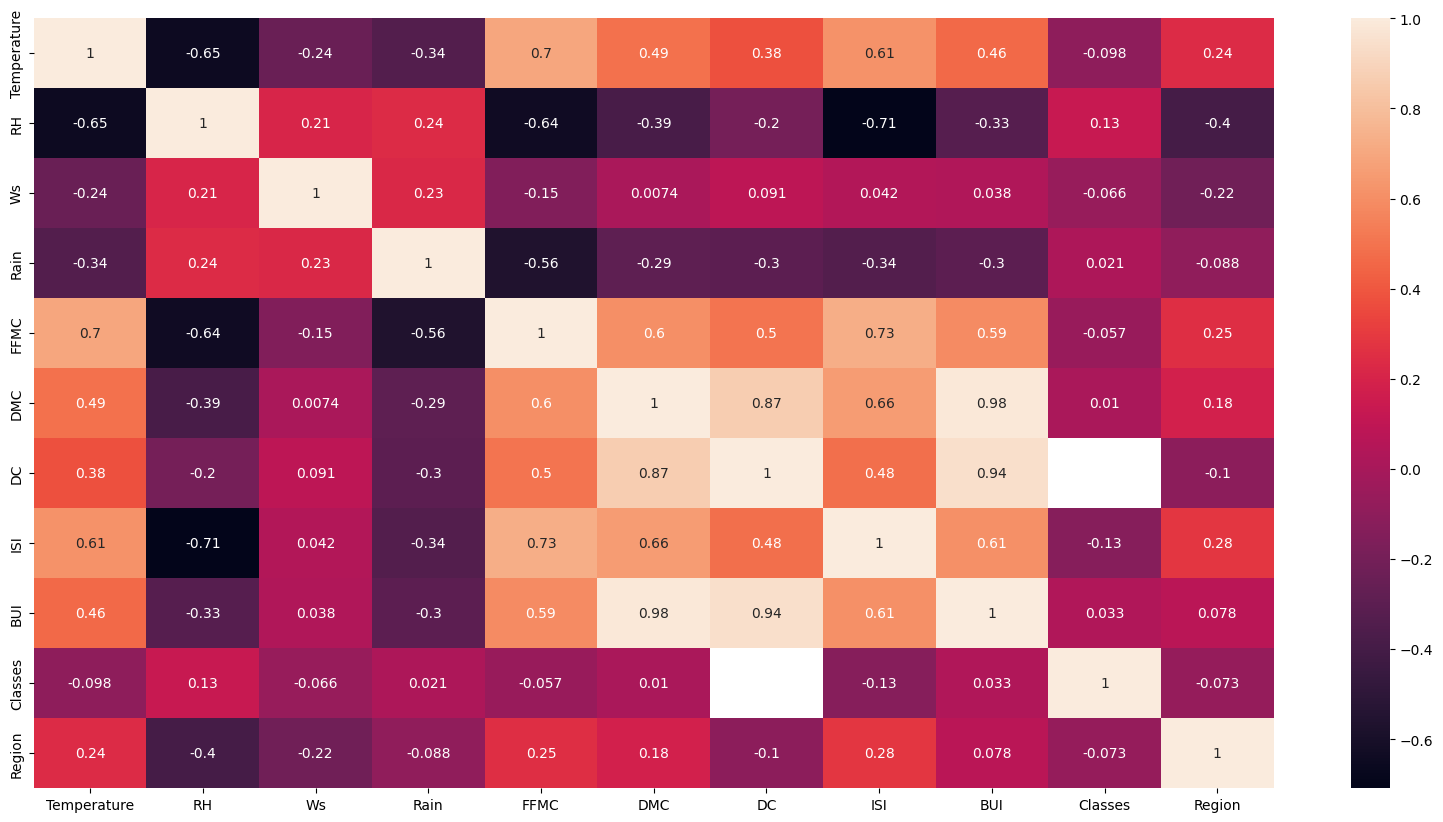

In [29]:
## Check for multicollinearity
plt.figure(figsize=(20, 10))
corr= X_train.corr()
sns.heatmap(corr, annot=True)

In [30]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

In [32]:
# Threshold--Domain expertise
correlation(X_train, 0.90)

{'BUI'}

In [36]:
## drop features when correlation is more than 0.85 
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shap

NameError: name 'corr_features' is not defined

In [37]:
## drop features when correlation is more than 0.85 
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape


NameError: name 'corr_features' is not defined

In [ ]:
corr_matrix = X_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
corr_features = [col for col in upper.columns if any(upper[col] > 0.85)]

In [41]:
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape

((183, 0), (62, 0))

### Feature Scaling or Standardization

### Box Plots To understand Effect Of Standard Scaler


In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


In [61]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

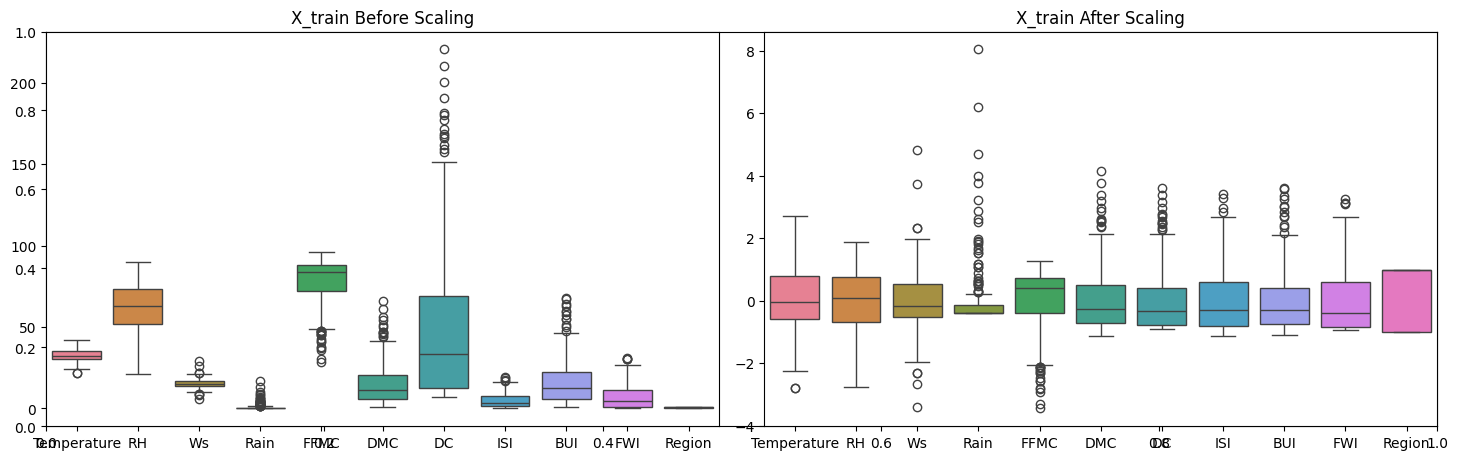

In [59]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')
plt.tight_layout()
plt.show()
